In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

In [3]:
fake.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
fake['class'] = 0
true['class'] = 1

In [6]:
data = pd.concat([fake , true] , axis = 0)
data.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [7]:
data.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [8]:
data = data.drop(['title' ,'subject' ,'date'] ,axis = 1)

In [9]:
data.isna().sum()

text     0
class    0
dtype: int64

In [10]:
data = data.sample(frac = 1)

In [11]:
data.head()

,text,class
1491,Remember when Republicans were told to stop ta...,0
2087,We all knew that Donald Trump would be a night...,0
4766,WASHINGTON (Reuters) - Leaders of the Congress...,1
9412,(Reuters) - Opening statements in the ethics t...,1
21466,Unprofessional? For those of you who might not...,0


In [12]:
data.reset_index(inplace = True)

In [13]:
data = data.drop('index' , axis = 1)
data.head()

,text,class
0,Remember when Republicans were told to stop ta...,0
1,We all knew that Donald Trump would be a night...,0
2,WASHINGTON (Reuters) - Leaders of the Congress...,1
3,(Reuters) - Opening statements in the ethics t...,1
4,Unprofessional? For those of you who might not...,0


In [14]:
def process_data(text):
    text = text.lower()
    text = re.sub(r'https?://S+|www\.\S+' , '' , text)
    text = re.sub('\n' , '' , text)
    text = re.sub('\[.*?\]', '', text)
    words = []
    for i in text:
        if i not in string.punctuation:
            words.append(i)
    return ''.join(words)  

In [15]:
data['text'] = data['text'].apply(process_data)

In [16]:
data['text'].head()

0    remember when republicans were told to stop ta...
1    we all knew that donald trump would be a night...
2    washington reuters  leaders of the congression...
3    reuters  opening statements in the ethics tria...
4    unprofessional for those of you who might not ...
Name: text, dtype: object

In [17]:
x = data['text']
y = data['class']

In [18]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.25)

In [19]:
vectorize = TfidfVectorizer()
xVect_train = vectorize.fit_transform(x_train)
xVect_test = vectorize.transform(x_test)

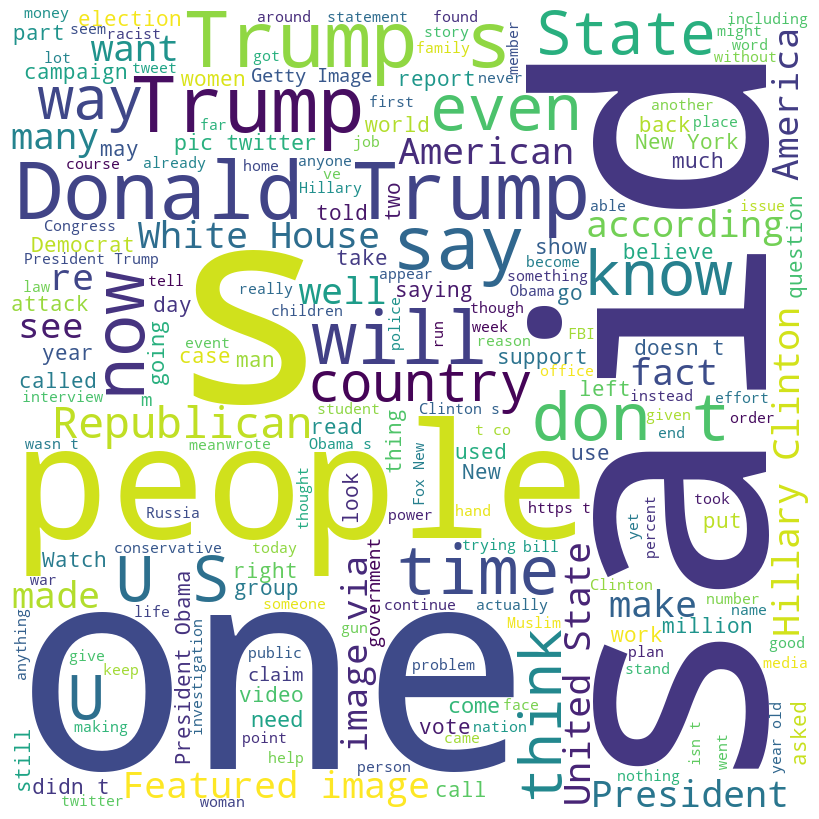

In [20]:
from wordcloud import WordCloud , STOPWORDS
stopwords = set(STOPWORDS)
all_text = " ".join(fake['text'])
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(all_text)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

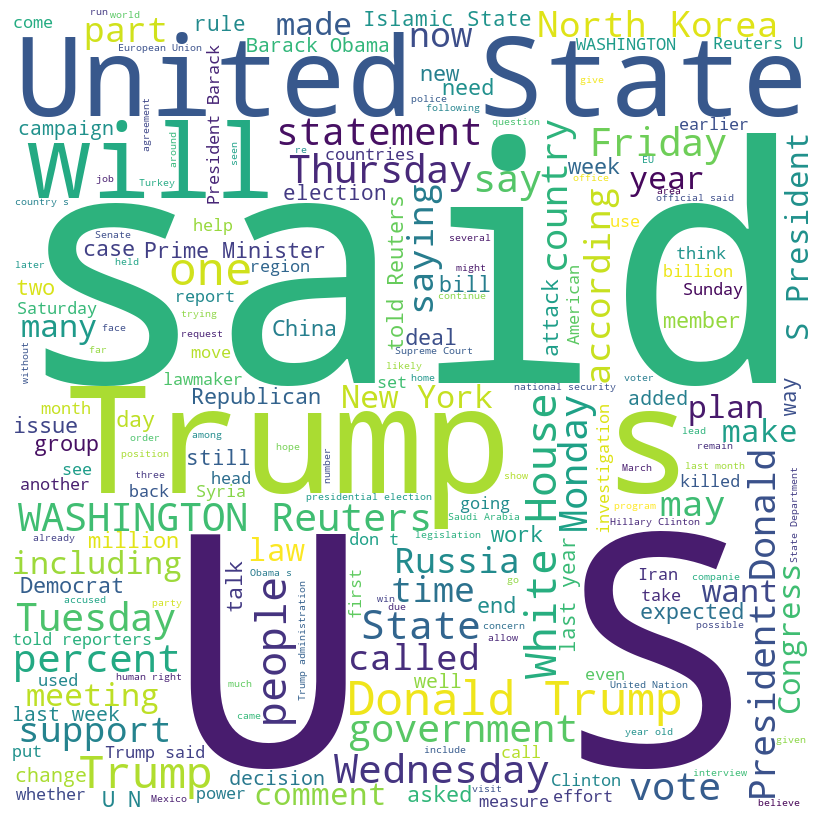

In [21]:
all_text = " ".join(true['text'])
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(all_text)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

# Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(xVect_train , y_train)

LogisticRegression()

In [23]:
y_predict_lr = lr.predict(xVect_test)

In [24]:
accuracy_score(y_test , y_predict_lr)

0.9862806236080178

In [25]:
print(classification_report(y_test, y_predict_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5925
           1       0.98      0.99      0.99      5300

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



# Naive Bayes

In [26]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(xVect_train , y_train)

MultinomialNB()

In [27]:
y_predict_nb = nb.predict(xVect_test)
accuracy_score(y_test , y_predict_nb)

0.9408463251670378

In [28]:
print(classification_report(y_test, y_predict_nb))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      5925
           1       0.93      0.94      0.94      5300

    accuracy                           0.94     11225
   macro avg       0.94      0.94      0.94     11225
weighted avg       0.94      0.94      0.94     11225



# Decision Tree 

In [29]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(xVect_train , y_train)

DecisionTreeClassifier()

In [30]:
y_predict_dt = dt.predict(xVect_test)
accuracy_score(y_test , y_predict_dt)

0.9968819599109131

In [31]:
print(classification_report(y_test, y_predict_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5925
           1       1.00      1.00      1.00      5300

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



# Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(xVect_train , y_train)

RandomForestClassifier()

In [33]:
y_predict_rf = rf.predict(xVect_test)
accuracy_score(y_test , y_predict_rf)

0.9838752783964365

In [34]:
print(classification_report(y_test, y_predict_rf))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5925
           1       0.98      0.98      0.98      5300

    accuracy                           0.98     11225
   macro avg       0.98      0.98      0.98     11225
weighted avg       0.98      0.98      0.98     11225



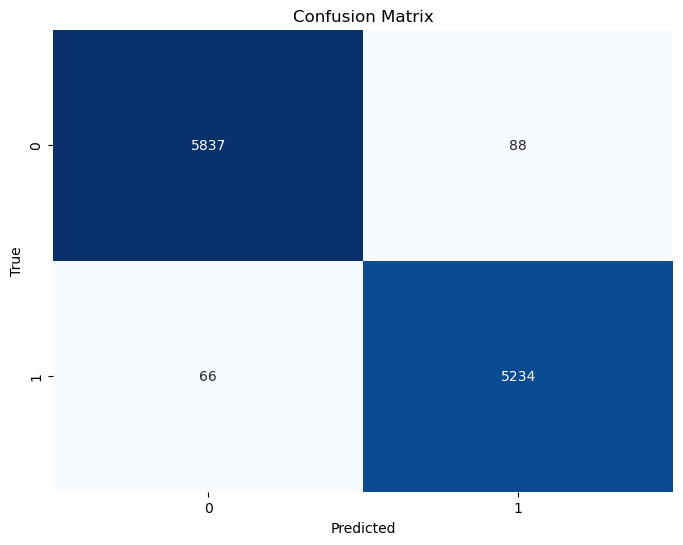

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict_lr)
# Plot confusion matrix for Logistic regression
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=lr.classes_, yticklabels=lr.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

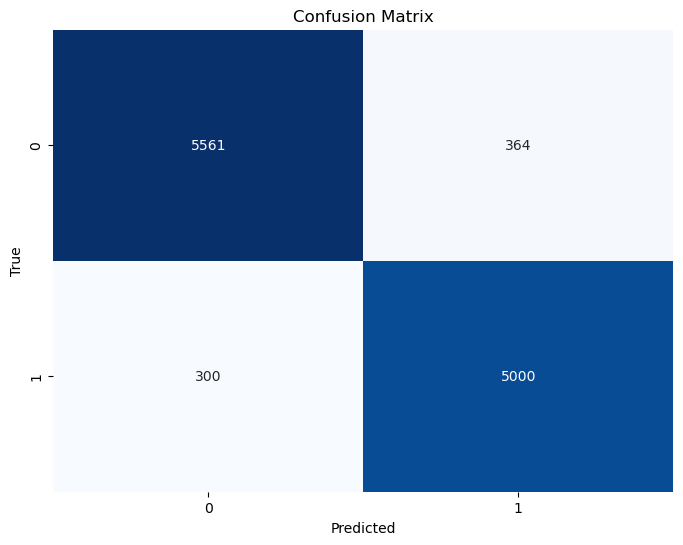

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict_nb)
# Plot confusion matrix for Naive Bayes
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

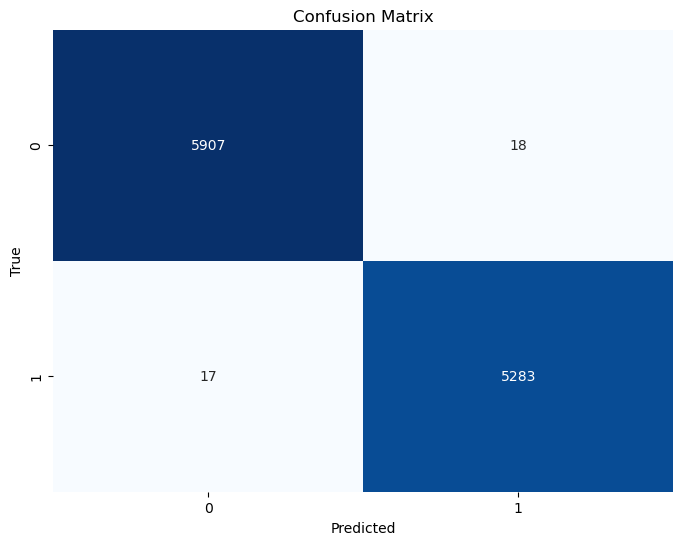

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict_dt)
# Plot confusion matrix for Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=dt.classes_, yticklabels=dt.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

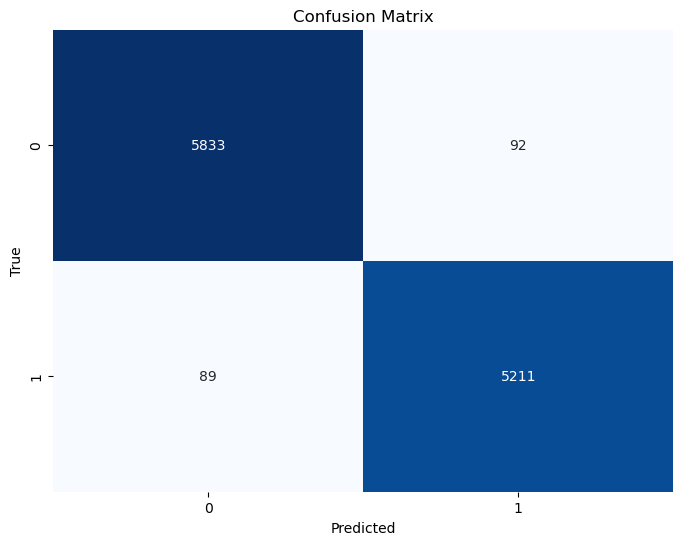

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict_rf)
# Plot confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Logistic Regression Accuracy: 0.9862806236080178
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5925
           1       0.98      0.99      0.99      5300

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225

Naive Bayes Accuracy: 0.9408463251670378
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      5925
           1       0.93      0.94      0.94      5300

    accuracy                           0.94     11225
   macro avg       0.94      0.94      0.94     11225
weighted avg       0.94      0.94      0.94     11225

Decision Tree Accuracy: 0.996347438752784
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5925
           1       1.00      1.00      1.00      5300

    accuracy                           1.00     11

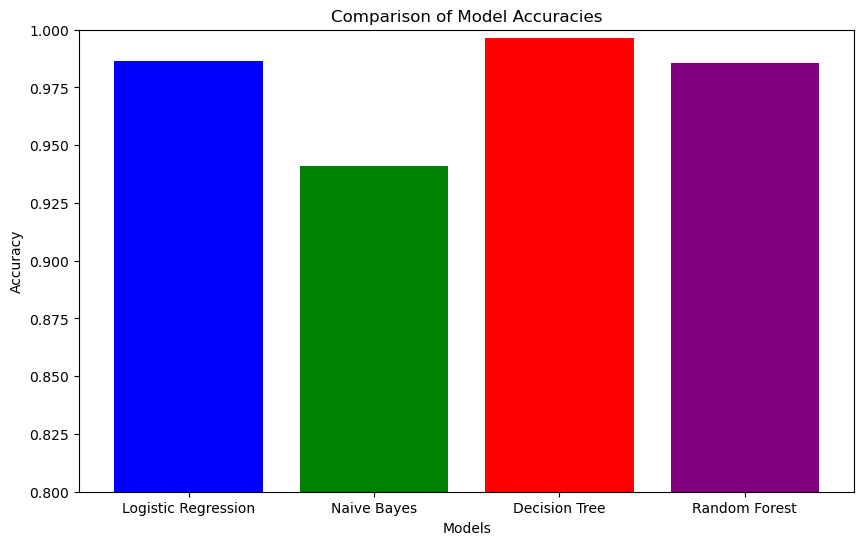

In [67]:
# Initialize and train models
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Dictionary to store accuracy scores
accuracy_scores = {}

for model_name, model in models.items():
    model.fit(xVect_train, y_train)
    y_predict = model.predict(xVect_test)
    accuracy = accuracy_score(y_test, y_predict)
    accuracy_scores[model_name] = accuracy
    print(f"{model_name} Accuracy: {accuracy}")
    print(classification_report(y_test, y_predict))

# Plot accuracy comparison
plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0.8, 1)
plt.show()

In [43]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [60]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorize.transform(new_x_test)
    pred_LR = lr.predict(new_xv_test)
    pred_DT = dt.predict(new_xv_test)
    pred_NB =nb.predict(new_xv_test)
    pred_RF = rf.predict(new_xv_test)
    
    return print("LR Prediction: {} \nNB Prediction: {} \nDT Prediction: {} \nRF Prediction: {}".format(output_lable(pred_LR[0]),                                                                                                       output_lable(pred_DT[0]), 
                                                                                                              output_lable(pred_NB[0]), 
                                                                                                              output_lable(pred_DT[0]),
                                                                                                              output_lable(pred_RF[0])))

In [61]:
news = "Vidya is America's first women president"
manual_testing(news)

LR Prediction: Fake News 
NB Prediction: Fake News 
DT Prediction: Fake News 
RF Prediction: Fake News


In [62]:
news = "Trump is not one of America's President"
manual_testing(news)

LR Prediction: Fake News 
NB Prediction: Fake News 
DT Prediction: Fake News 
RF Prediction: Fake News


In [63]:
news = "SEATTLE/WASHINGTON (Reuters) - President Donald Trump called on the U.S. Postal Service "
manual_testing(news)

LR Prediction: Not A Fake News 
NB Prediction: Not A Fake News 
DT Prediction: Not A Fake News 
RF Prediction: Not A Fake News


In [64]:
news = "As U.S. budget fight looms, Republicans flip their fiscal script "
manual_testing(news)

LR Prediction: Fake News 
NB Prediction: Fake News 
DT Prediction: Fake News 
RF Prediction: Fake News


In [65]:
news = "SNL Hilariously Mocks Accused Child Molester Roy Moore For Losing AL Senate Race (VIDEO)"
manual_testing(news)

LR Prediction: Fake News 
NB Prediction: Fake News 
DT Prediction: Fake News 
RF Prediction: Fake News
